In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import seaborn as sns

household_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Household Estimates")

food_service_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Food Service Estimates")

retail_df = pd.read_excel("UN Food Waste Index Source and Worksheet.xlsx", sheet_name="Retail Estimates")

In [2]:
household_df.columns

Index(['Region', 'M49 code', 'Country', 'ISO-alpha3 code',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', 'Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD$)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [3]:
household_df_with_two_columns = household_df[['GDP Per Capita (2015 Constant)', "Household estimate (kg/capita/year)"]].dropna(axis=0)
# household_df_with_two_columns

,GDP Per Capita (2015 Constant),Household estimate (kg/capita/year)
0,529.741210,81.729904
1,4410.455165,82.783773
2,3834.435591,91.016180
3,11839.010501,75.713119
4,34588.053724,84.272380
...,...,...
209,2661.572764,91.016180
211,3316.002658,76.161693
212,1144.416671,103.797982
213,1273.879558,77.920000


In [4]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = household_df_with_two_columns[x_vars]
y_var = "Household estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(household_df_with_two_columns[y_var], x1_modified).fit()
print(model_household.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Household estimate (kg/capita/year)   R-squared:                       0.069
Model:                                             OLS   Adj. R-squared:                  0.065
Method:                                  Least Squares   F-statistic:                     14.78
Date:                                 Sat, 17 Dec 2022   Prob (F-statistic):           0.000163
Time:                                         17:02:49   Log-Likelihood:                -860.88
No. Observations:                                  200   AIC:                             1726.
Df Residuals:                                      198   BIC:                             1732.
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                     coe

In [23]:
household_df_with_two_columns = household_df[['GDP Per Capita (2015 Constant)', "Household estimate (kg/capita/year)"]].dropna(axis=0)
# household_df_with_two_columns

<Figure size 1500x800 with 0 Axes>

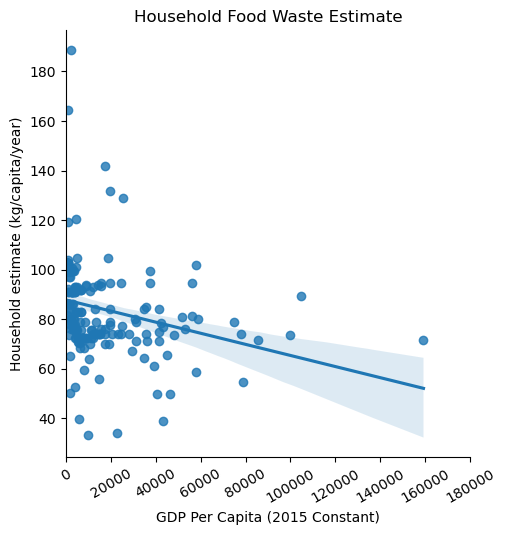

In [6]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=household_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Household Food Waste Estimate')

In [7]:
household_df.columns

Index(['Region', 'M49 code', 'Country', 'ISO-alpha3 code',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', 'Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD$)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [32]:
household_df = household_df.dropna()

y_var = "Household estimate (kg/capita/year)"

x_vars = [
    "Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD$)",
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]
# x_vars = [
#     "Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]


household_df["2020 GDP (2015 Constant)"] = ((household_df["2020 GDP (2015 Constant)"]-household_df["2020 GDP (2015 Constant)"].mean())/(household_df["2020 GDP (2015 Constant)"].max()-household_df["2020 GDP (2015 Constant)"].min()))
household_df["Tourism Receipts (Current USD$)"] = ((household_df["Tourism Receipts (Current USD$)"]-household_df["Tourism Receipts (Current USD$)"].mean())/(household_df["Tourism Receipts (Current USD$)"].max()-household_df["Tourism Receipts (Current USD$)"].min()))


X = household_df[x_vars]
x_modified=sm.add_constant(X)
model_household = sm.OLS(household_df[y_var], x_modified).fit()


# # # Get the coefficients, p-values, and standard errors & odds ratio
# # coefs = model_household.params
# # p_values = model_household.pvalues
# # std_errors = model_household.bse


# # # Print the results in a table
# # table_household = pd.DataFrame({
# #     'Variable': x_modified.columns,
# #     'Coefficient': coefs,
# #     'p-value': p_values,
# #     'Standard Error': std_errors,
    
# # })


# ## Print the table dataframe
# # print(table_household)

# ## Write the table dataframe to a CSV file
# # table_household.to_csv('Household table.csv')

## Print Summary Statistics

print(y_var)
print(model_household.summary())

##Print Confidence Interval
# print(model_household.conf_int(alpha=0.05, cols=None))

# # Calculate the correlation matrix
# corr_matrix = x_modified.corr()

# # Print the correlation matrix
# # print(corr_matrix)


# # ##Write the dataframe to a CSV file
# # corr_matrix.to_csv('Household corr_matrix.csv')




Household estimate (kg/capita/year)
                                     OLS Regression Results                                    
Dep. Variable:     Household estimate (kg/capita/year)   R-squared:                       0.196
Model:                                             OLS   Adj. R-squared:                  0.153
Method:                                  Least Squares   F-statistic:                     4.598
Date:                                 Sat, 17 Dec 2022   Prob (F-statistic):           7.47e-06
Time:                                         17:10:35   Log-Likelihood:                -846.30
No. Observations:                                  200   AIC:                             1715.
Df Residuals:                                      189   BIC:                             1751.
Df Model:                                           10                                         
Covariance Type:                             nonrobust                                         
    

In [9]:
food_service_df.columns

Index(['Region', 'M49 code', 'Country', 'Country Code',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       '2020 Population', '2020 Access to Electricity CC',
       '2020 GDP (2015 Constant)', 'GDP Per Capita (2015 Constant)',
       'Tourism Receipts (Current USD)', 'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [10]:
food_service_df_with_two_columns = food_service_df[['GDP Per Capita (2015 Constant)', "Food service estimate (kg/capita/year)"]].dropna(axis=0)
food_service_df_with_two_columns

,GDP Per Capita (2015 Constant),Food service estimate (kg/capita/year)
0,529.741210,27.648075
1,4410.455165,27.648075
2,3834.435591,27.648075
3,11839.010501,27.648075
4,34588.053724,25.570418
...,...,...
209,2661.572764,27.648075
211,3316.002658,27.648075
212,1144.416671,27.648075
213,1273.879558,27.648075


In [22]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = food_service_df_with_two_columns[x_vars]
y_var = "Food service estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(food_service_df_with_two_columns[y_var], x1_modified).fit()
# print(model_household.summary())

<Figure size 1500x800 with 0 Axes>

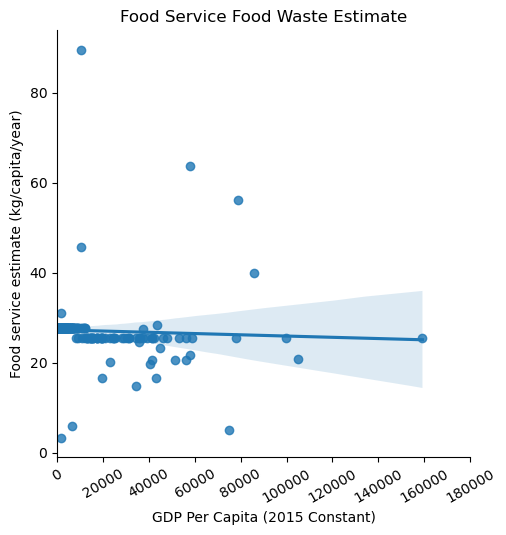

In [12]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=food_service_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Food Service Food Waste Estimate')


In [13]:
food_service_df = food_service_df.dropna()
food_service_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            204, 205, 206, 207, 208, 209, 211, 212, 213, 214],
           dtype='int64', length=199)

In [28]:
y_var = "Food service estimate (kg/capita/year)"


x_vars = [
    "2020 Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD)",
    'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]
# x_vars = [
#     "2020 Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]

# Use below if you need to normalize
food_service_df["2020 GDP (2015 Constant)"] = ((food_service_df["2020 GDP (2015 Constant)"]-food_service_df["2020 GDP (2015 Constant)"].mean())/(food_service_df["2020 GDP (2015 Constant)"].max()-food_service_df["2020 GDP (2015 Constant)"].min()))
food_service_df["Tourism Receipts (Current USD)"] = ((food_service_df["Tourism Receipts (Current USD)"]-food_service_df["Tourism Receipts (Current USD)"].mean())/(food_service_df["Tourism Receipts (Current USD)"].max()-food_service_df["Tourism Receipts (Current USD)"].min()))


X = food_service_df[x_vars]
x_modified=sm.add_constant(X)
model_food_service = sm.OLS(food_service_df[y_var],x_modified).fit()

# Get the coefficients, p-values, and standard errors
coefs = model_food_service.params
p_values = model_food_service.pvalues
std_errors = model_food_service.bse

# # Print the results in a table
# table_food_service = pd.DataFrame({
#     'Variable': x_modified.columns,
#     'Coefficient': coefs,
#     'p-value': p_values,
#     'Standard Error': std_errors
# })

# # Print the table
# print(table_food_service)
# # Write the dataframe to a CSV file
# table_food_service.to_csv('Table Food Service.csv')

##Print the confidence interval
# print(model_food_service.conf_int(alpha=0.05, cols=None))

##Print Food Service Summary Statistics
print(y_var)
print(model_food_service.summary())

# Calculate the correlation matrix
# corr_matrix = x_modified.corr()

# # Print the correlation matrix
# print(corr_matrix)

##Write the dataframe to a CSV file
# corr_matrix.to_csv('food service corr_matrix.csv')







Food service estimate (kg/capita/year)
                                      OLS Regression Results                                      
Dep. Variable:     Food service estimate (kg/capita/year)   R-squared:                       0.162
Model:                                                OLS   Adj. R-squared:                  0.117
Method:                                     Least Squares   F-statistic:                     3.635
Date:                                    Sat, 17 Dec 2022   Prob (F-statistic):           0.000190
Time:                                            17:06:12   Log-Likelihood:                -643.65
No. Observations:                                     199   AIC:                             1309.
Df Residuals:                                         188   BIC:                             1346.
Df Model:                                              10                                         
Covariance Type:                                nonrobust             

In [15]:
retail_df.columns

Index(['Region', 'M49 code', 'Country Code', 'Country',
       'Retail estimate (kg/capita/year)', 'Retail estimate (tonnes/year)',
       'Confidence in estimate', '2020 Population',
       '2020 Access to Electricity CC', '2020 GDP (2015 Constant)',
       'GDP Per Capita (2015 Constant)', 'Tourism Receipts (Current USD$)',
       'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [29]:
retail_df_with_two_columns = retail_df[['GDP Per Capita (2015 Constant)', "Retail estimate (kg/capita/year)"]].dropna(axis=0)
# retail_df_with_two_columns

In [33]:
x_vars = 'GDP Per Capita (2015 Constant)'
X = retail_df_with_two_columns[x_vars]
y_var = "Retail estimate (kg/capita/year)"
x1_modified=sm.add_constant(X)
model_household = sm.OLS(retail_df_with_two_columns[y_var], x1_modified).fit()
print(model_household.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Retail estimate (kg/capita/year)   R-squared:                       0.027
Model:                                          OLS   Adj. R-squared:                  0.022
Method:                               Least Squares   F-statistic:                     5.456
Date:                              Sat, 17 Dec 2022   Prob (F-statistic):             0.0205
Time:                                      17:12:20   Log-Likelihood:                -631.38
No. Observations:                               198   AIC:                             1267.
Df Residuals:                                   196   BIC:                             1273.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                                     coef    std err          t      P

<Figure size 1500x800 with 0 Axes>

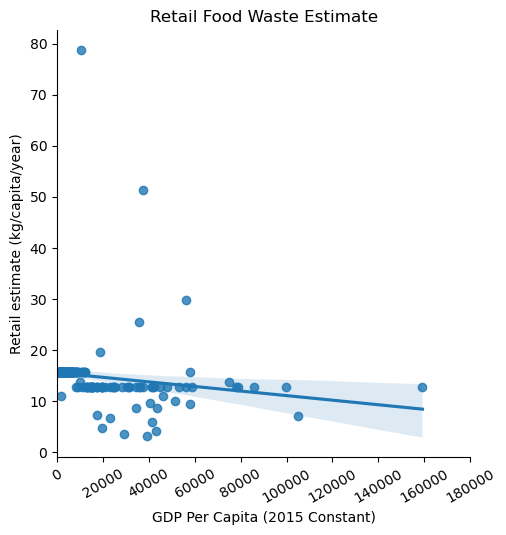

In [18]:
plt.figure(figsize = (15,8))
ax = sns.lmplot(x = x_vars,y = y_var,data=retail_df_with_two_columns)
ax.set_xticklabels(rotation = 30, size = 10)
ax.set(xlim = (0, None), title = 'Retail Food Waste Estimate')

In [19]:
retail_df = retail_df.dropna()
retail_df.columns

Index(['Region', 'M49 code', 'Country Code', 'Country',
       'Retail estimate (kg/capita/year)', 'Retail estimate (tonnes/year)',
       'Confidence in estimate', '2020 Population',
       '2020 Access to Electricity CC', '2020 GDP (2015 Constant)',
       'GDP Per Capita (2015 Constant)', 'Tourism Receipts (Current USD$)',
       'Tourism % GDP ',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Rural population', 'Food Production Index',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [20]:
y_var = "Retail estimate (kg/capita/year)"

x_vars = [
    "2020 Access to Electricity CC",
    "2020 GDP (2015 Constant)",
    "Tourism Receipts (Current USD$)",
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Rural population',
'Food Production Index',
'Imports of goods and services (% of GDP)',
    'Exports of goods and services (% of GDP)',
    'Electric power consumption (kWh per capita)',
'Population density (people per sq. km of land area)'
]
# x_vars = [
#     "2020 Access to Electricity CC",
#     "GDP Per Capita (2015 Constant)",
#     "Tourism % GDP "]

#Use below if you need to normalize
retail_df["2020 GDP (2015 Constant)"] = ((retail_df["2020 GDP (2015 Constant)"]-retail_df["2020 GDP (2015 Constant)"].mean())/(retail_df["2020 GDP (2015 Constant)"].max()-retail_df["2020 GDP (2015 Constant)"].min()))
retail_df["Tourism Receipts (Current USD$)"] = ((retail_df["Tourism Receipts (Current USD$)"]-retail_df["Tourism Receipts (Current USD$)"].mean())/(retail_df["Tourism Receipts (Current USD$)"].max()-retail_df["Tourism Receipts (Current USD$)"].min()))

X = retail_df[x_vars]
x_modified=sm.add_constant(X)

model_retail = sm.OLS(retail_df[y_var],x_modified).fit()

# This is for the summary table 
# Get the coefficients, p-values, and standard errors
coefs = model_retail.params
p_values = model_retail.pvalues
std_errors = model_retail.bse

# Print the results in a table
table_retail = pd.DataFrame({
    'Variable': x_modified.columns,
    'Coefficient': coefs,
    'p-value': p_values,
    'Standard Error': std_errors
})

# # Print the dataframe
# print(table_retail)

# # Write the dataframe to a CSV file
# table_retail.to_csv('Table Retail.csv')

print(y_var)
print(model_retail.summary())

print(model_household.conf_int(alpha=0.05, cols=None))
# household_df.head()

# Calculate the correlation matrix
corr_matrix = x_modified.corr()

# Print the correlation matrix
# print(corr_matrix)

##Write the dataframe to a CSV file
corr_matrix.to_csv('retail corr_matrix.csv')



Retail estimate (kg/capita/year)
                                   OLS Regression Results                                   
Dep. Variable:     Retail estimate (kg/capita/year)   R-squared:                       0.021
Model:                                          OLS   Adj. R-squared:                 -0.032
Method:                               Least Squares   F-statistic:                    0.3929
Date:                              Sat, 17 Dec 2022   Prob (F-statistic):              0.949
Time:                                      17:02:50   Log-Likelihood:                -632.04
No. Observations:                               198   AIC:                             1286.
Df Residuals:                                   187   BIC:                             1322.
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
                                     

In [21]:
# #This cell is being used for attempting to make more informative plots

# # Define the data
# access_to_electricity = ["2020 Access to Electricity CC"]
# gdp_per_capita = ["GDP Per Capita (2015 Constant)"]
# tourism_percentage_gdp = ["Tourism % GDP"]
# retail_estimates = ["const"]

# # Define the actual observations
# observation_access_to_electricity = ["2020 Access to Electricity CC"]
# observation_gdp_per_capita = ["GDP Per Capita (2015 Constant)"]
# observation_retail_estimates = ["const"]

# # Create the scatter plot with two y-axes
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

# # Plot the data for the first independent variable on the first y-axis
# ax1.scatter(access_to_electricity, retail_estimates, label="Access to Electricity")

# # Plot the data for the second independent variable on the second y-axis
# ax2.scatter(gdp_per_capita, retail_estimates, label="GDP Per Capita")

# # Plot the actual observations on the first y-axis
# ax1.scatter(observation_access_to_electricity, observation_retail_estimates, label="Actual Observations", color="red")

# # Add a legend and label the axes
# ax1.legend(loc=1)
# ax2.legend(loc=2)
# ax1.set_xlabel("Access to Electricity and Tourism % GDP")
# ax1.set_ylabel("Retail Estimate (kg/capita/year)")
# ax2.set_ylabel("GDP Per Capita")

# # Show the plot
# plt.show()